In [306]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

# RandomForest Regression
from sklearn.ensemble import RandomForestRegressor

In [19]:
print(f"Installed numpy version: {np.__version__}")
print(f"Installed pandas version: {pd.__version__}")
print(f"Installed matplotlib version: {matplotlib.__version__}")
print(f"Installed seaborn version: {sns.__version__}")

Installed numpy version: 1.26.4
Installed pandas version: 2.2.2
Installed matplotlib version: 3.8.4
Installed seaborn version: 0.13.2


## import and explore the dataset

In [ ]:
df = pd.read_csv('data/insurance.csv')

df.head(10)

In [89]:
print("Total no of samples in dataset:", df.shape)

Total no of samples in dataset: (1338, 7)


In [91]:
print("Information about dataset features and data-type")
df.info()

Information about dataset features and data-type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [97]:
# No missing and NaN values
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [99]:
# check the null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [101]:
# No of unique values in categorical columns
print("Unique values in sex column:", df['sex'].unique())
print("Unique values in children column:", df['children'].unique())
print("Unique values in smoker column:", df['smoker'].unique())
print("Unique values in region column:", df['region'].unique())

Unique values in sex column: ['female' 'male']
Unique values in children column: [0 1 3 2 5 4]
Unique values in smoker column: ['yes' 'no']
Unique values in region column: ['southwest' 'southeast' 'northwest' 'northeast']


In [103]:
# Encoding categorical columns
from sklearn.preprocessing import LabelEncoder

# sex column (Male: 1, Fenale: 0)
le = LabelEncoder()
le.fit( df['sex'].drop_duplicates() )
df['sex'] = le.transform(df['sex'])

In [107]:
print("Learned classes in sex column")
le.classes_

Learned classes in sex column


array(['female', 'male'], dtype=object)

In [116]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,southwest,16884.9240
1,18,1,33.77,1,0,southeast,1725.5523
2,28,1,33.00,3,0,southeast,4449.4620


In [112]:
# patient is smoker or not
le.fit( df['smoker'].drop_duplicates() ) 

# Yes: 1, No: 0
df['smoker'] = le.transform( df['smoker'] )

In [114]:
le.classes_

array(['no', 'yes'], dtype=object)

In [122]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,southwest,16884.9240
1,18,1,33.77,1,0,southeast,1725.5523
2,28,1,33.00,3,0,southeast,4449.4620


In [128]:
# region column
le.fit( df['region'].drop_duplicates() )

df['region'] = le.transform( df['region'] )

In [132]:
# 0 for 'northeast', 1 for 'northwest', 2 for 'southeast', 3 for 'southwest'
le.classes_

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [134]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


In [138]:
# finding the correlation
df.corr()['charges'].sort_values(ascending = False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

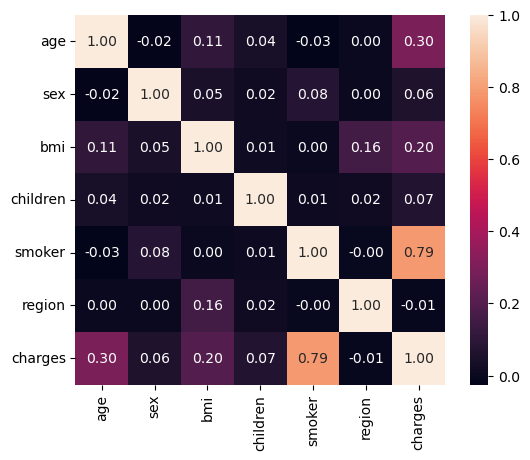

In [160]:
# using heatmap
corr_values = df.corr()
sns.heatmap(data = corr_values, square = True,annot = True, fmt = ".2f")

plt.show()

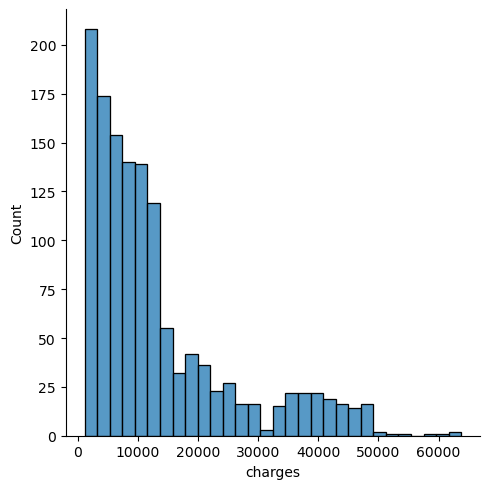

In [184]:
# knowing more about data
sns.displot(df["charges"])

plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_4908\2308622053.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(smoker_patients["charges"], color = 'c', ax = ax)
C:\Users\Dell\AppData\Local\Temp\ipykernel_4908\2308622053.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_smoker_patients['ch

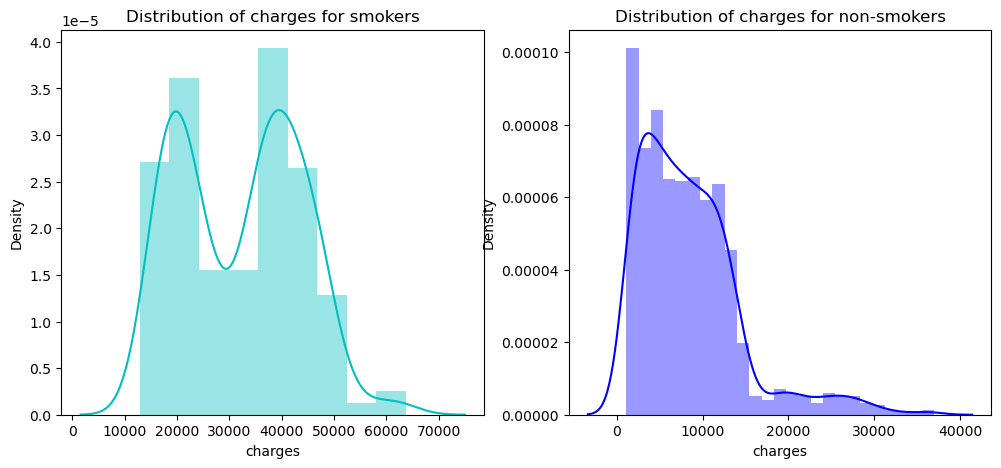

In [188]:
smoker_patients = df[df['smoker'] == 1]
non_smoker_patients = df[df['smoker'] == 0]

f= plt.figure(figsize=(12,5))

ax = f.add_subplot(121)
sns.distplot(smoker_patients["charges"], color = 'c', ax = ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(non_smoker_patients['charges'], color = 'b', ax = ax)
ax.set_title('Distribution of charges for non-smokers')

plt.show()

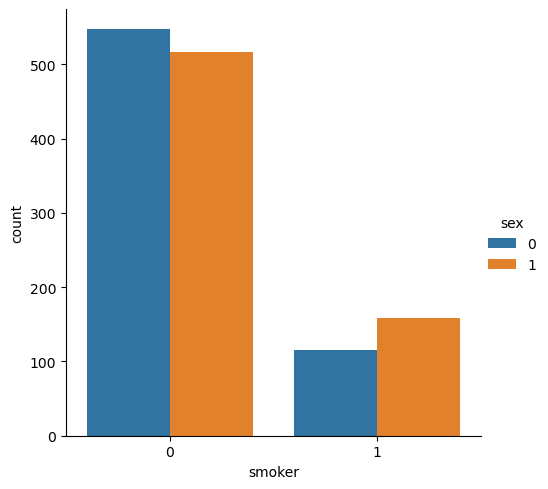

In [202]:
# finding no of smoker and non-smokers

# Here, in legend: 0 shows femal, and 1 shows male candidates
sns.catplot(data= df, x = "smoker", kind = "count", hue = "sex")

plt.show()

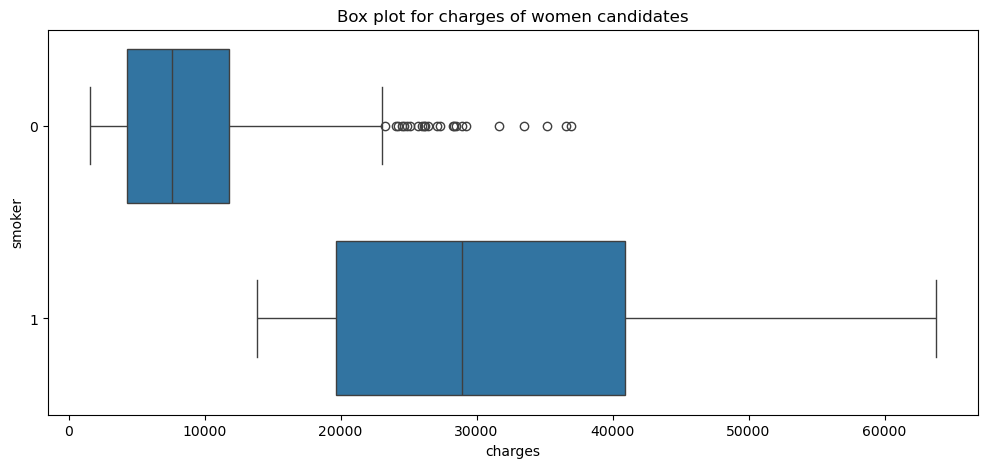

In [216]:
# box plots for charges
# extract women insurance data
female_data = df[ df["sex"] == 0]

plt.figure(figsize = (12,5))
sns.boxplot(data = female_data, x = "charges", y = "smoker", orient = 'h')

plt.title("Box plot for charges of women candidates")
plt.show()

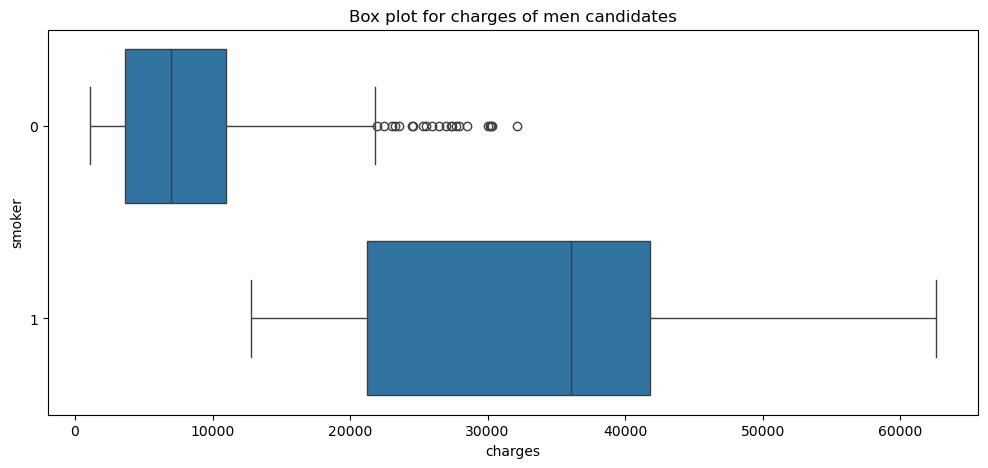

In [225]:
# box plots for charges
# extract men insurance data
men_data = df[ df["sex"] == 1]

plt.figure(figsize = (12,5))
sns.boxplot(data = men_data, x = "charges", y = "smoker", orient = 'h')

plt.title("Box plot for charges of men candidates")
plt.show()

<Figure size 800x500 with 0 Axes>

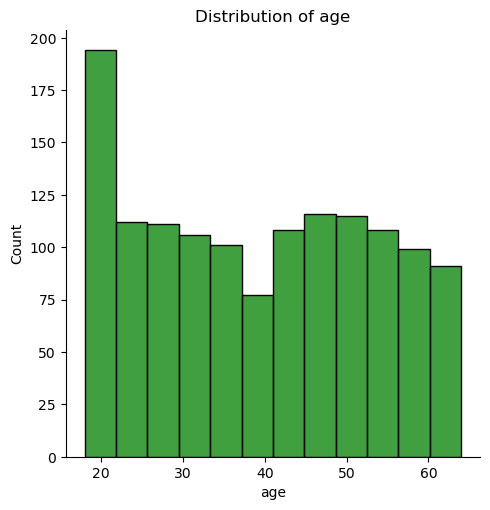

In [239]:
# let's pay attention to the age of the patients
plt.figure(figsize = (8,5))
ax = sns.displot(df["age"], kind = 'hist', color = 'g')
plt.title("Distribution of age")

plt.show()

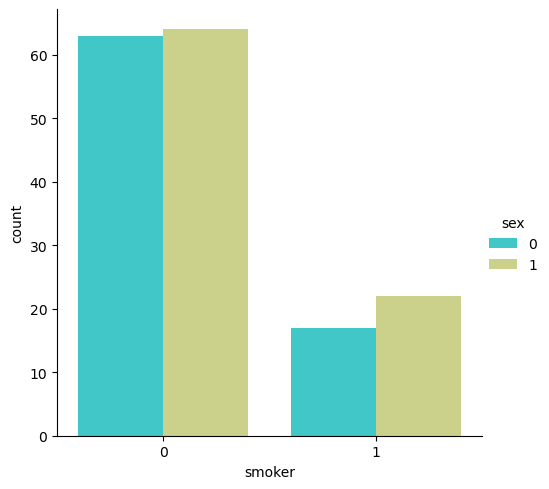

In [247]:
patient_18_to_20 = df[ (df['age'] >= 18) & (df['age'] <=20) ]

# Here in legend: 0 shows female patients, and 1 shows male
sns.catplot(data = patient_18_to_20, x = "smoker", kind = "count", 
            hue = "sex", palette = "rainbow")

plt.show()

Text(0.5, 1.0, 'Box plot for charges 18 years old smokers')

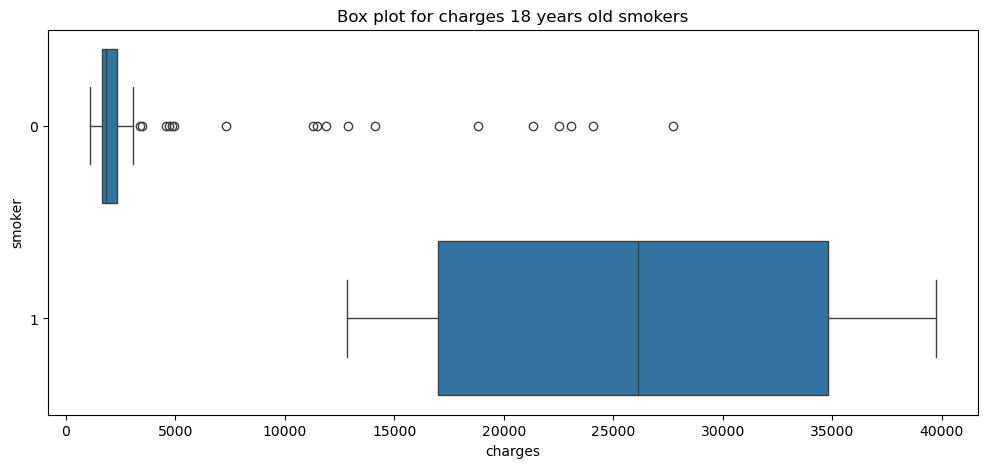

In [257]:
patient_18_to_20 = df[ (df['age'] >= 18) & (df['age'] <=20) ]

plt.figure(figsize = (12,5))
sns.boxplot(data = patient_18_to_20, x = "charges", y = "smoker",
            orient = "h")

plt.title("Box plot for charges 18 years old smokers")

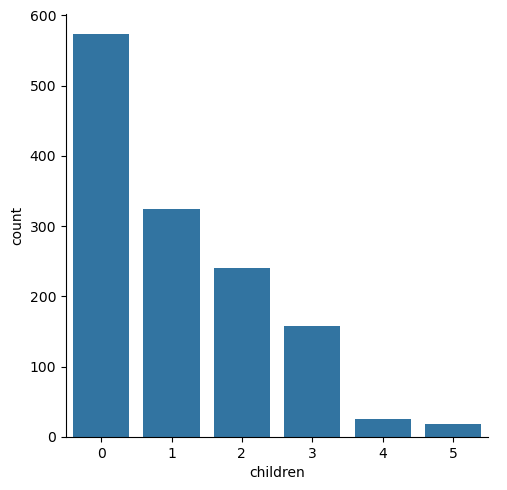

In [261]:
# let explore no of childrens
sns.catplot(data = df, x = "children", kind = "count")

plt.show()

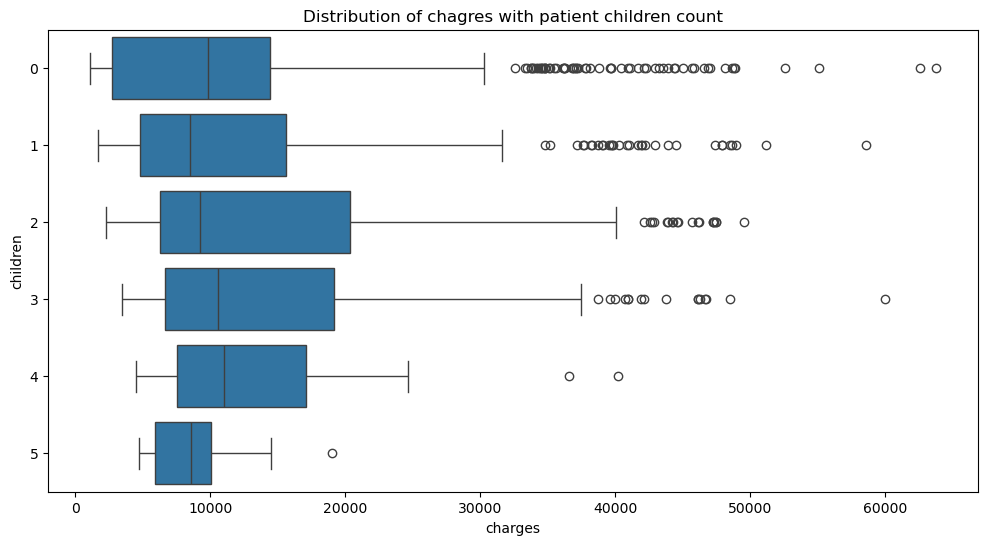

In [298]:
plt.figure(figsize = (12, 6))

sns.boxplot(data = df, x = "charges", y = "children", orient = "h")

plt.title("Distribution of chagres with patient children count")
plt.show()

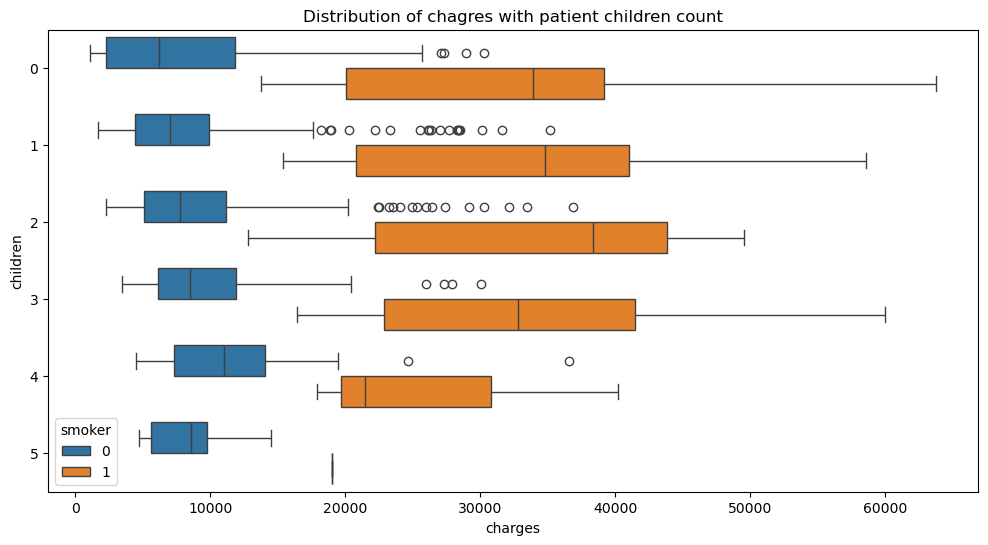

In [300]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df, x = "charges", y = "children", hue = "smoker",
            orient = "h")

plt.title("Distribution of chagres with patient children count")
plt.show()

In [304]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


In [302]:
# Here I want to clear some thing
# ---- In sex column: 0 shows female patient and 1 for male patient
# ----- In smoker column: 0 shows non-smoker, and 1 shows patient is smoker
# ----- In region column: values are from 0 to 3 w.r.t to index value of list below
# ['northeast', 'northwest', 'southeast', 'southwest']

In [324]:
x = df.drop(['charges'], axis = 1)
y = df['charges']

In [326]:
# features (X) set
x.head(3)

,age,sex,bmi,children,smoker,region
0,19,0,27.90,0,1,3
1,18,1,33.77,1,0,2
2,28,1,33.00,3,0,2


In [328]:
y.head(3)

0    16884.9240
1     1725.5523
2     4449.4620
Name: charges, dtype: float64

In [330]:
# data preparsion for model training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, 
                                                    random_state = 42)

In [334]:
print("shape of train set", x_train.shape)
print("Shape of test set", x_test.shape)

shape of train set (1070, 6)
Shape of test set (268, 6)


In [336]:
# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [338]:
# make prediction
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [354]:
# comparing 
print("Actual values from test set:\n", np.array(y_test[:10]))
print("Predicted values from test set:\n", np.array(y_test_pred[:10]))

Actual values from test set:
 [ 9095.06825  5272.1758  29330.98315  9301.89355 33750.2918   4536.259
  2117.33885 14210.53595  3732.6251  10264.4421 ]
Predicted values from test set:
 [ 8924.40724442  7116.29501758 36909.01352144  9507.87469118
 27013.3500079  10790.77956153   226.29844571 16942.71599941
  1056.63079407 11267.91997309]


In [366]:
print(f"MSE train data: {mean_squared_error(y_train, y_train_pred)}")
print(f"MSE test data: {mean_squared_error(y_test, y_test_pred)}")

print(f"R2 Score train data: {r2_score(y_train, y_train_pred)}")
print(f"R2 Score test data: {r2_score(y_test, y_test_pred)}")


MSE train data: 37280663.22256598
MSE test data: 33635210.43117842
R2 Score train data: 0.7417049283233981
R2 Score test data: 0.7833463107364538


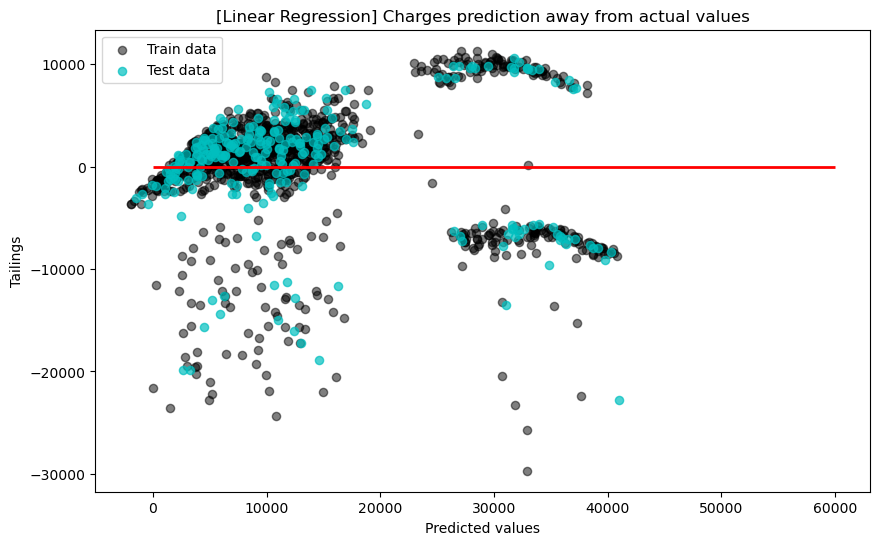

In [396]:
# result analysis
plt.figure(figsize = (10,6))

# scatter of train-data predictions
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'black', 
           marker = 'o', s = 35, alpha = 0.5, label = 'Train data')

# scatter of test-data predictions
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'c', 
           marker = 'o', s = 35, alpha = 0.7, label = 'Test data')

# add horizental line (red colour)
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

plt.title("[Linear Regression] Charges prediction away from actual values")

plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')


plt.show()

In [374]:
# Model 2: RandomForest Regressor
rf_reg = RandomForestRegressor(n_estimators = 150,
                              criterion = 'squared_error',
                              random_state = 42,
                              n_jobs = -1)

rf_reg.fit(x_train, y_train)
rf_train_pred = rf_reg.predict(x_train)
rf_test_pred = rf_reg.predict(x_test)

In [376]:
print(f"[RandomForest] MSE train data: {mean_squared_error(y_train, rf_train_pred)}")
print(f"[RandomForest] MSE test data: {mean_squared_error(y_test, rf_test_pred)}")

print(f"[RandomForest] R2 Score train data: {r2_score(y_train, rf_train_pred)}")
print(f"[RandomForest] R2 Score test data: {r2_score(y_test, rf_test_pred)}")

[RandomForest] MSE train data: 3584628.652382249
[RandomForest] MSE test data: 20934867.14900853
[RandomForest] R2 Score train data: 0.9751642853247141
[RandomForest] R2 Score test data: 0.8651527329863056


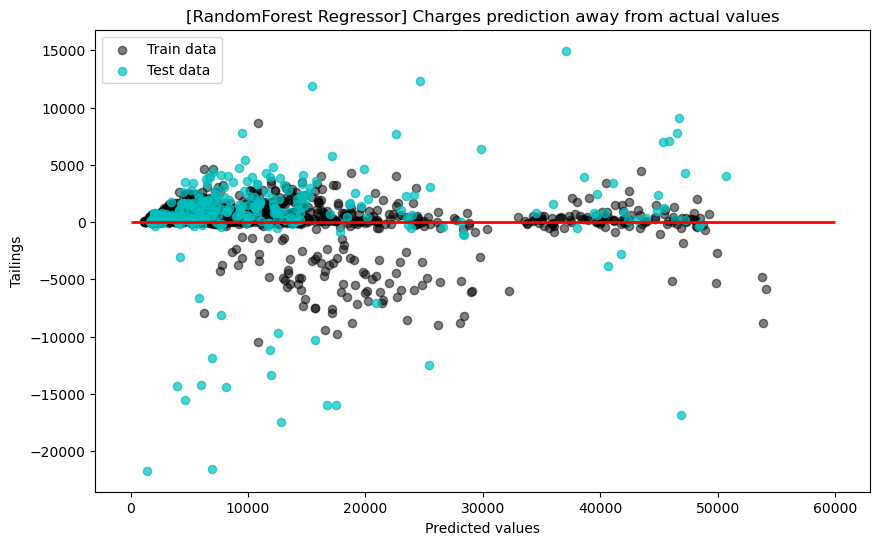

In [394]:
# result analysis
plt.figure(figsize = (10,6))

# scatter of train-data predictions
plt.scatter(rf_train_pred, rf_train_pred - y_train, c = 'black', 
           marker = 'o', s = 35, alpha = 0.5, label = 'Train data')

# scatter of test-data predictions
plt.scatter(rf_test_pred, rf_test_pred - y_test, c = 'c', 
           marker = 'o', s = 35, alpha = 0.7, label = 'Test data')

# add horizental line (red colour)
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

plt.title("[RandomForest Regressor] Charges prediction away from actual values")

plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')


plt.show()

In [402]:
# save the random Forest model
import pickle

pickle_model_path = "model.pkl"
with open(pickle_model_path, 'wb') as f:
    pickle.dump(rf_reg, f)

print("Model saved successfully")

Model saved successfully
